In [14]:
import shutil, os, glob
import pickle as pkl

path = "/code/Unlearn-Bench/examples/results/CIFAR10/ResNet18/EmpiricalRiskMinimization/IDwiseUnlearnLoader_data_seed_2_train_seed_2/*.pkl"

pkl_files = glob.glob(path)

METHODS = [
    'Origin',
    'Retrain',
    'RandomLabel_epoch_10_lr_0.01_num_classes_10',
    'L1Sparse_epoch_10_lr_0.01_init_gamma_0.0005_schedule_ratio_-0.1',
    'BoundaryShrink_lr_1e-05_epoch_10',
    'BoundaryExpanding_lr_1e-05_epoch_10',
    'SCRUB_epoch_10_lr_0.0005_T_4_momentum_0.9_lr_decay_epochs_[3, 5, 9]_lr_decay_rate_0.1_m_steps_1_weight_decay_0.0005_beta_0.1'
]

METRICS = [
    'RunningTime', 
    'TestingAccuracy', 
    'RemainAccuracy',
    'UnlearnAccuracy', 
    'ForgettingAccuracy', 
    'MIAEfficacy', 
    'SimpleMIA', 
    'KSEval', 
    'WassDistance'
]

In [22]:
full_results = dict()
for method in METHODS:
    full_results[method] = dict()
    for metric in METRICS:
        full_results[method][metric] = []

for pkl_path in list(glob.glob(path)):
    with open(pkl_path, 'rb') as f:
        content = pkl.load(f)
    print(content.keys())
    for metric in content:
        # metric_name = metric[0]
        metric_result = content[metric]
        for method_0 in metric_result.keys():
            method = method_0[0]
            full_results[method][metric].append(metric_result[method_0])
    # break

dict_keys(['RunningTime', 'TestingAccuracy', 'RemainAccuracy', 'UnlearnAccuracy', 'ForgettingAccuracy', 'MIAEfficacy', 'SimpleMIA', 'KSEval', 'WassDistance'])
dict_keys(['RunningTime', 'TestingAccuracy', 'RemainAccuracy', 'UnlearnAccuracy', 'ForgettingAccuracy', 'MIAEfficacy', 'SimpleMIA', 'KSEval', 'WassDistance'])
dict_keys(['RunningTime', 'TestingAccuracy', 'RemainAccuracy', 'UnlearnAccuracy', 'ForgettingAccuracy', 'MIAEfficacy', 'SimpleMIA', 'KSEval', 'WassDistance'])
dict_keys(['RunningTime', 'TestingAccuracy', 'RemainAccuracy', 'UnlearnAccuracy', 'ForgettingAccuracy', 'MIAEfficacy', 'SimpleMIA', 'KSEval', 'WassDistance'])
dict_keys(['RunningTime', 'TestingAccuracy', 'RemainAccuracy', 'UnlearnAccuracy', 'ForgettingAccuracy', 'MIAEfficacy', 'SimpleMIA', 'KSEval', 'WassDistance'])


In [47]:
import numpy as np

for method in full_results.keys():
    print(method)
    for metric in full_results[method]:
        # print(full_results[method][metric])
        if not isinstance(full_results[method][metric][0], (tuple, list)):
            print(method, metric, np.mean(full_results[method][metric]), np.std(full_results[method][metric]))
        else:
            print(method, metric, full_results[method][metric], len(full_results[method][metric][0]))
            for i in range(len(full_results[method][metric][0])):
                temp = []
                for j in full_results[method][metric]:
                    # print('j', j, i)
                    temp.append(j[i])
                print(method, metric, i, temp, np.mean(temp), np.std(temp))
            # for result in full_results[method][metric]:
            #     print(result)
            # for i in range(len(full_results[method][metric])):
            #     print(method, metric, np.mean(full_results[method][metric]), np.std(full_results[method][metric]))

Origin
Origin RunningTime 0.9673081398010254 1.8603804791207803
Origin TestingAccuracy 0.931 0.0
Origin RemainAccuracy 0.9996088888888888 0.00010385174618263487
Origin UnlearnAccuracy 0.99968 0.00029933259094191793
Origin ForgettingAccuracy 0.99956 0.000387814388593314
Origin MIAEfficacy 0.00763999999999998 0.0005851495535330974
Origin SimpleMIA [(0.5503, 0.5752303999999999, 0.672355162521862), (0.5520000000000002, 0.576788, 0.6775762668659645), (0.5582, 0.5752396, 0.6736408922492789), (0.5560999999999999, 0.5872580000000001, 0.6498599137817058), (0.5601, 0.5723879999999999, 0.6872870930221834)] 3
Origin SimpleMIA 0 [0.5503, 0.5520000000000002, 0.5582, 0.5560999999999999, 0.5601] 0.55534 0.003687058448139907
Origin SimpleMIA 1 [0.5752303999999999, 0.576788, 0.5752396, 0.5872580000000001, 0.5723879999999999] 0.5773807999999999 0.005139017437604249
Origin SimpleMIA 2 [0.672355162521862, 0.6775762668659645, 0.6736408922492789, 0.6498599137817058, 0.6872870930221834] 0.6721438656881988 0.0

## Plot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use('science')

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'


plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":11})     

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

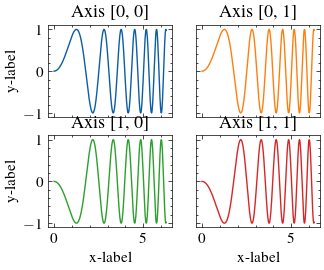

In [2]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()